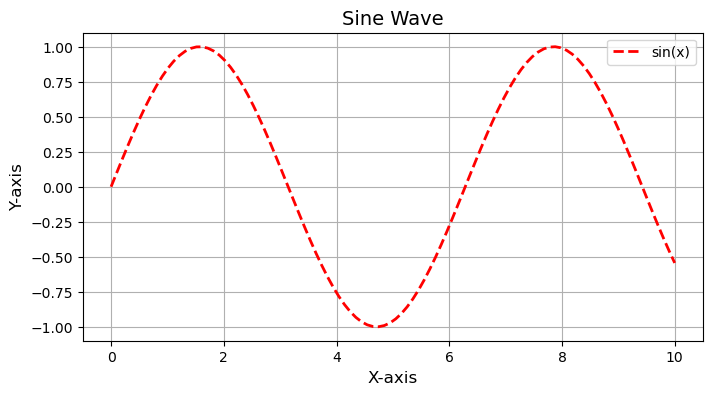

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 创建数据
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 绘制图表
plt.figure(figsize=(8, 4))  # 设置画布大小
plt.plot(x, y, 
         color='red',       # 线条颜色
         linestyle='--',    # 线型
         linewidth=2,       # 线宽
         label='sin(x)')    # 图例标签

# 添加标注
plt.title("Sine Wave", fontsize=14)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)
plt.grid(True)              # 显示网格
plt.legend()                # 显示图例

plt.show()

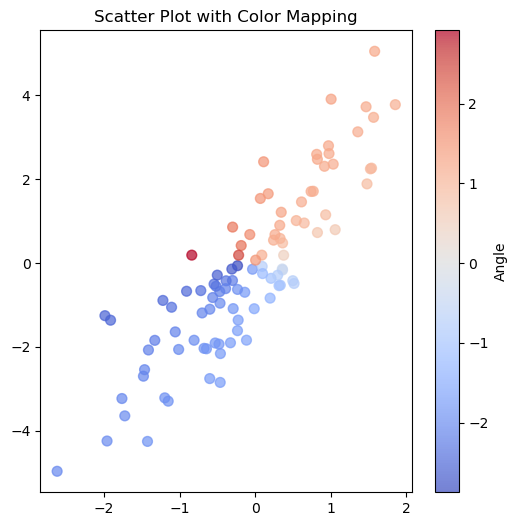

In [3]:
# 生成随机数据
np.random.seed(42)
x = np.random.randn(100)
y = x * 2 + np.random.randn(100)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, 
           c=np.arctan2(y, x),  # 颜色映射
           s=50,                # 点大小
           alpha=0.7,           # 透明度
           cmap='coolwarm')      # 颜色方案

plt.colorbar(label='Angle')     # 添加颜色条
plt.title("Scatter Plot with Color Mapping")
plt.show()

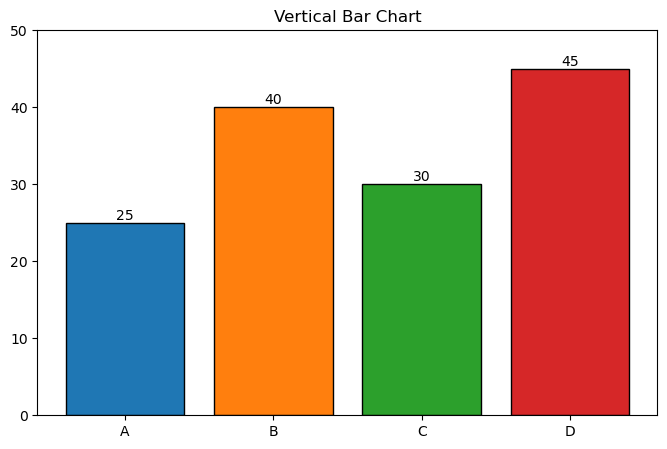

In [4]:
categories = ['A', 'B', 'C', 'D']
values = [25, 40, 30, 45]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values,
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
              edgecolor='black')

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.ylim(0, 50)
plt.title("Vertical Bar Chart")
plt.show()

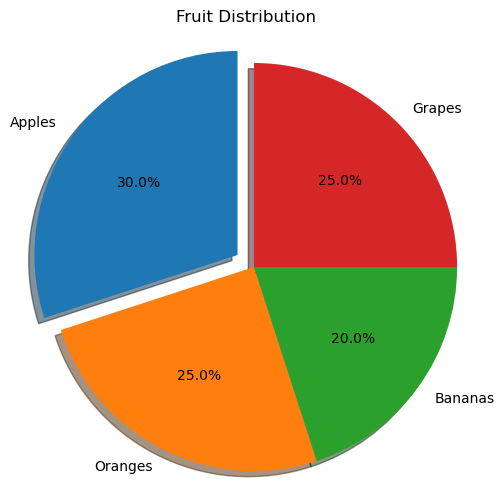

In [5]:
labels = ['Apples', 'Oranges', 'Bananas', 'Grapes']
sizes = [30, 25, 20, 25]
explode = (0.1, 0, 0, 0)  # 突出显示第一项

plt.figure(figsize=(6, 6))
plt.pie(sizes, 
       labels=labels,
       explode=explode,
       autopct='%1.1f%%',   # 显示百分比格式
       shadow=True,        # 添加阴影
       startangle=90)      # 起始角度

plt.title("Fruit Distribution")
plt.axis('equal')  # 保证圆形
plt.show()

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold

# 设置随机种子保证可复现性
torch.manual_seed(42)

# 1. 加载并预处理数据
data = "F:\实验室\波士顿房价预测数据集.xlsx"
X = data.data.astype(np.float32)  # 转换为float32格式
y = data.target.astype(np.int64)  # 转换为int64格式（PyTorch要求）

# 转换为PyTorch张量
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# 2. 定义神经网络模型
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(4, 64),     # 输入层4个特征
            nn.ReLU(),
            nn.Linear(64, 32),   # 隐藏层
            nn.ReLU(),
            nn.Linear(32, 3)      # 输出层3个类别（无需softmax，CrossEntropyLoss会自动处理）
        )
    
    def forward(self, x):
        return self.layers(x)

# 3. 设置K折参数
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []

# 4. 执行K折交叉验证
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_tensor)):
    print(f"\nFold #{fold + 1}")
    
    # 划分训练集/验证集
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]
    
    # 创建模型、损失函数和优化器
    model = IrisClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # 训练循环
    epochs = 50
    batch_size = 16
    
    for epoch in range(epochs):
        # 随机打乱训练数据
        permutation = torch.randperm(X_train.size()[0])
        
        for i in range(0, X_train.size()[0], batch_size):
            # 获取小批量数据
            indices = permutation[i:i+batch_size]
            batch_X = X_train[indices]
            batch_y = y_train[indices]
            
            # 前向传播
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    # 验证评估
    with torch.no_grad():
        outputs = model(X_val)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == y_val).sum().item()
        val_acc = correct / y_val.size(0)
    
    accuracies.append(val_acc)
    print(f"Validation Accuracy: {val_acc:.4f}")

# 5. 输出最终结果
print("\nFinal Results:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} (±{np.std(accuracies):.4f})")

AttributeError: 'str' object has no attribute 'data'